# Programming Assignment 1:  Simple Linear Regression

In this assignment, you will load data, plot data, perform simple mathematical manipulations, and fit a simple linear regression model. The assignment uses the Boston housing data set, a widely-used machine learning data set for illustrating basic concepts.  


Please add your own print statements to check your code to ensure your code is correct in every step. (Note: we will not be grading the print statements you add to your code.)

## Loading the data

The Boston housing data set was collected in the 1970s to study the relationship between house price and various factors such as the house size, crime rate, socio-economic status, etc.  Since the variables are easy to understand, the data set is ideal for learning basic concepts in machine learning.  The raw data and a complete description of the dataset can be found on the UCI website:

https://archive.ics.uci.edu/ml/datasets/Housing

In the lab, you will complete all the code marked `TODO`. 

First, complete the following code that uses the `pd.read_csv` command to read the data from the file located at

https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data

I have supplied a list `names` of the column headers.  You will have to set the options in the `read_csv` command to correctly delimit the data in the file and name the columns correctly.

In [179]:
# run this code cell using shift+enter before moving further

import numpy as np
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

In [206]:
names =[
    'CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 
    'AGE',  'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'PRICE'
]

# TODO:  Complete the code
# I used local file because remote file on website does not resolve 
df = pd.read_csv('./boston_housing_data.txt', delim_whitespace=True, header=None, names=names)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222.0,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311.0,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311.0,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311.0,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311.0,15.2,386.71,17.10,18.9


Display the first six rows of the data frame after adding the appropriate column headers

In [207]:
df.head(6)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222.0,18.7,394.12,5.21,28.7


## Basic Manipulations on the Data

What is the shape of the data?  How many attributes are there?  How many samples?
Print a statement of the form:

    num samples=xxx, num attributes=yy

#### If done correctly: num_samples = 506, num_attributes = 14

In [208]:
# TODO
print("num_samples=", df.shape[0], ", num_attributes=", df.shape[1], sep='')

num_samples=506, num_attributes=14


Create a response vector `y` with the values in the column `PRICE`.  The vector `y` should be a 1D `numpy.array` structure.

In [209]:
# TODO
y = df.values[:,13]

Use the response vector `y` to find the mean house price in thousands and the fraction of homes that are above $40k. (You may realize this is very cheap.  Prices have gone up a lot since the 1970s!).   Create print statements of the form:

    The mean house price is xx.yy thousands of dollars.
    Only x.y percent are above $40k.

#### If done correctly: The mean house price is 22.53 thousands of dollars. Only 0.4 percent are above $40k.

In [210]:
# TODO
mean = np.round(y.mean(), 2)
portion = np.round((len(np.where(y > 40)[0]) / len(y)) * 100, 1)
print("The mean house price is", mean, "thousands of dollars. Only", portion, "percent are above $40k.")

The mean house price is 22.53 thousands of dollars. Only 6.1 percent are above $40k.


## Visualizing the Data

Python's `matplotlib` has very good routines for plotting and visualizing data that closely follows the format of MATLAB programs.  You can load the `matplotlib` package with the following commands.

Similar to the `y` vector, create a predictor vector `x` containing the values in the `RM` column, which represents the average number of rooms in each region.

In [211]:
# TODO
x = df.values[:,5]

Create a scatter plot of the price vs. the `RM` attribute.  Make sure your plot has grid lines and label the axes with reasonable labels so that someone else can understand the plot.

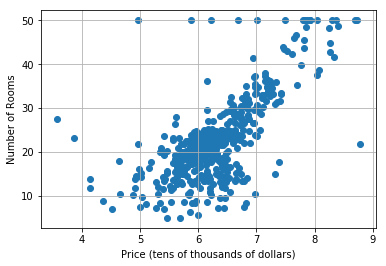

In [212]:
# TODO 
plt.scatter(x=x, y=y, marker='o')
plt.xlabel('Number of Rooms')
plt.ylabel('Price (tens of thousands of dollars)')
plt.grid(True)
plt.show()

## Fitting a Simple Linear Model

We will write a simple function to perform a linear fit. Use the formulae given in the class, to compute the parameters $w_0, w_1$ in the linear model $$y =w_0 + w_1 x + \epsilon$$ as well as the coefficient of determination $R^2$.

In [219]:
def fit_linear(x,y):
    """
    Given vectors of data points (x,y), performs a fit for the linear model:
       yhat = w0 + w1*x, 
    The function returns w0, w1 and rsq, where rsq is the coefficient of determination.
    """
    # TODO complete the following code
    ybar = np.mean(y)
    xbar = np.mean(x)
    
    w1 = (np.sum(x * y) - np.sum(x * ybar)) / (np.sum(x ** 2) - np.sum(x * xbar)) 
    w0 = ybar - (w1 * xbar)

    
    yhat = np.add(w0, w1 * x)
    TSS = np.sum(np.subtract(y, ybar) ** 2)
    RSS = np.sum(np.subtract(y, yhat) ** 2)
    rsq = 1 - (RSS/TSS)
    return w0, w1, rsq

Using the function `fit_linear` above, print the values `w0`, `w1` and `rsq` for the linear model of price vs. number of rooms.

In [220]:
# TODO
w0, w1, rsq = fit_linear(x, y)

Replot the scatter plot above, but now with the regression line.  You can create the regression line by creating points `xp` from say 4 to 9, computing the linear predicted values `yp` on those points and plotting `yp` vs. `xp` on top of the above plot.

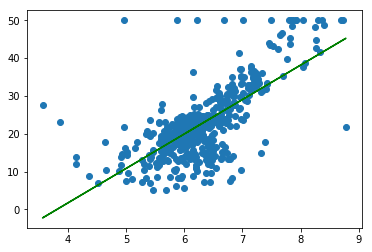

In [221]:
# TODO 
plt.scatter(x=x, y=y, marker='o')
plt.plot(x, np.add(w0, w1 * x), color='green')
plt.show()

# Compute coefficients of determination

We next compute the $R^2$ values for all the predictors and output the values in a table. Your table should look like the following, where each the first column is the attribute name and the second column is the $R^2$ value.

    CRIM        0.151
    ZN          0.130
    INDUS       0.234
    ...         ...

To index over the set of colunms in the dataframe `df`, you can either loop over the items in the `names` lists (skipping over the final name `PRICE`) or loop over integer indices and use the method, `df.iloc`.

In [230]:
# TODO
for i in range(len(names)) :
    if names[i] != "PRICE":
        w0, w1, rsq = fit_linear(df.values[:,i], y)
        print(names[i], np.round(rsq, 3), sep='\t\t')

CRIM		0.151
ZN		0.13
INDUS		0.234
CHAS		0.031
NOX		0.183
RM		0.484
AGE		0.142
DIS		0.062
RAD		0.146
TAX		0.22
PTRATIO		0.258
B		0.111
LSTAT		0.544


---------------------------------------------------------------------------------------------------------------------

You have finished the first part of the asssignment, feel free to take a break and come back to do the second part

## Implementing Linear Regression Using Gradient Descent 

In this lab, you will be implementing the Linear Regression Model. We will be using the gradient descent algorithm (GDA) and the stochastic gradient descent algorithm (SGDA) to minimize the cost function as we covered in the class.


# Loading the data set.

In [233]:
# After completing the code in this code cell, run this code cell before moving further.
names =[
    'CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 
    'AGE',  'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'PRICE'
]

# TODO
df = pd.read_csv('./boston_housing_data.txt', delim_whitespace=True, header=None, names=names)


Fetch the values from the 'PRICE' and 'RM' columns. into a smaller dataframe named df1 from df. This step is the same as was done in programming_assignment_1a.  Then drop rows with NaN values from df1, and save the result in df2.

In [232]:
# TODO
df1 = df["PRICE"]
df2 = df["RM"]

# Check the shape of df2. It should be (506,2)


Create a vector y having the values of 'PRICE' column and vector x having the values of 'RM' column. This step is also same as done in programming_assignment_1a.

In [237]:
# TODO
x = df1.values
y = df2.values
# Check the shape of x and y vectors.


AttributeError: 'numpy.ndarray' object has no attribute 'values'

Reshape x and y to be rank 2 (here we refer to the number of dimentions of a array as it's rank). After checking the shape of x and y in the above code cell, we see that x and y are rank 1 matricies. Before proceeding,  convert them to be rank 2 matricies. For example, you could use the command x=x.reshape(x.shape[0],1) to reshape x.

In [236]:
# TODO
x = x.reshape(x.shape[0],1)
x.shape
y = None


# Gradient Descent
Write the code to perform gradient descent in the function below.  In this assigment, we will run the algorithm a fixed number of iterations.  Later in the course, we will add a simple extension by adding a stopping criteria.

Calculating the value of N, i.e. number of training examples. 
Hint: Value of N is equal to the number of rows in either x or y matrix which can be accessed using the numpy shape command.

In [195]:
# TODO
N = None

Compute the cost: Write the code to compute the cost inside the function. Do not change the function name or function parameters.

In [196]:
def compute_cost(x, y, w0, w1, N):
    #Write your code in place of None. Cost can be calculated using a single line of code
    cost = None
    
    return cost

Before moving ahead, ensure that the code you have written to compute the cost is correct. Just run the below cell.

In [197]:
cost_verify= compute_cost(x, y, 0, 0, N)
print(cost_verify)

None


Your output should be equal to 296.073458498.  Ensure your answer is correct before continuing

In [198]:
def gradient_descent(x, y, learning_rate, w0, w1, N, num_iters):
    # In place of None, write the updated value of w0 in temp0 and of w1 in temp1
    for i in range(num_iters):
        temp0 =   None
        temp1 =   None
        w0 =temp0
        w1= temp1
        
        if(i%100==0):
            # In place of None, call the cost you just coded above
            cost= None
            print("Cost")
            print(cost)
            print("w's")
            print(w0)
            print(w1) 
            
    return w0,w1       

Before moving ahead, ensure that your code to update beta0 and beta1 is correct. Run the code cell below.

In [199]:
g=gradient_descent(x, y, 0.04, 0, 0, N, 10000)
print(g[0])

Cost
None
w's
None
None
Cost
None
w's
None
None
Cost
None
w's
None
None
Cost
None
w's
None
None
Cost
None
w's
None
None
Cost
None
w's
None
None
Cost
None
w's
None
None
Cost
None
w's
None
None
Cost
None
w's
None
None
Cost
None
w's
None
None
Cost
None
w's
None
None
Cost
None
w's
None
None
Cost
None
w's
None
None
Cost
None
w's
None
None
Cost
None
w's
None
None
Cost
None
w's
None
None
Cost
None
w's
None
None
Cost
None
w's
None
None
Cost
None
w's
None
None
Cost
None
w's
None
None
Cost
None
w's
None
None
Cost
None
w's
None
None
Cost
None
w's
None
None
Cost
None
w's
None
None
Cost
None
w's
None
None
Cost
None
w's
None
None
Cost
None
w's
None
None
Cost
None
w's
None
None
Cost
None
w's
None
None
Cost
None
w's
None
None
Cost
None
w's
None
None
Cost
None
w's
None
None
Cost
None
w's
None
None
Cost
None
w's
None
None
Cost
None
w's
None
None
Cost
None
w's
None
None
Cost
None
w's
None
None
Cost
None
w's
None
None
Cost
None
w's
None
None
Cost
None
w's
None
None
Cost
None
w's
None
None
Cost
None
w's
No

The last output should be: -34.3837376153. Ensure that you have the correct result before continuing.

# Integerating the Batch Gradient Descent Function 

Using the above code, create a single function linear_reg_model_gda: This function uses the gradient descent algorithm to minimize the cost.

In [200]:
def linear_reg_model_gda(x, y, N, learning_rate, num_iters):
    #initialize the values of parameters w0 and w1 both to 0
    w0=None
    w1=None
    
    #calculate the initial cost by calling the function you just coded above
    initial_cost=None
    print("Initial Cost")
    print(initial_cost)
    
    #calculate the optimized value of w0 and w1 by calling the gradient_descent function coded above
    
    w0,w1= None
    
    #Calculate the cost with the optimized value of w0 and w1 by calling the cost function.
    
    final_cost=None
    print("Final Cost")
    print(final_cost)
    return w0,w1
    

Now, when you have completed the linear_reg_model_gda function, you can use this function to find the optimized values of w0 and w1. Using it, set the values of learning_rate and num_iters to something reasonable. You may have to call this function several times with different values of num_iters and learning_rate to find the optimal values of w0 and w1. For some values of learning_rate, you may recieve incorrect values of w0 and w1, wherein they reach a very large value(infinity) due to overshooting as was discussed in class. Finally, the values of w0, w1 and cost(RSS) should be same(or very close to) the ones in Part 1 of this assignment.

In [201]:
# Write your code below
learning_rate=None
num_iters=None
# In place of None, call the linear_reg_model_gda.
w0,w1=None

TypeError: 'NoneType' object is not iterable

# Predicting the Price of a House

Use your function to train your linear regression model to find the optimal values for $w_0$ and $w_1$.  Once you have the optimal values for the parameters, you can predict the value of $y$ (price) using $x$ (rm).  Compute the function below to prdict $y$, using $x$, $w_0$ and $w_1$

In [ ]:
def predict(x, w0, w1):
    predicted_y = None
    
    return predicted_y

Now, predict the price of a house with rm=6 using ```predict()```. 

In [ ]:
# Call the predict function with rm=6 
y_predict = None
print(y_predict)

The value should be approximately 19.54424 

# Normal Equation Method
Now, we will be writing the code to find the values of parameters w0 and w1 for our linear regression model. This can also be used to cross-check the optimal values of w0 and w1 we just found above using the above two models. These values should be approximately the same.

Step 1: Appending a column of ones to x in the left. Save this into X. You can first create a column vector of ones say 'a' (ensure this to have dimension (N,1) i.e. a rank 2 array). Now, you can use np.hstack to append it to the left of x.

In [ ]:
#Write the code below
a = None
X = None

Step 2: Instead of writing the code for normal equation in one line, you can break this into 3 parts: First calculate q=inverse of (dot of (X.T,X)) (these are pseudo commands, use original numpy commands to calculate q). Then w= dot of ( X.T , y) and then beta_vec= dot of (q,w). Here, beta_vec is vector of dimension (2,1) having two values. Example w0=w_vec[0][0]

In [ ]:
# Write the code below
q = None
w = None
w_vec = None
w0 = None
w1 = None

In [ ]:
print("w0 is " + str(w0))
print("w1 is " + str(w1))

The Values of w0 and w1 you just got above should be approximately the same as the ones you got using linear_reg_model_gda or linear_reg_model_sgda.


# Optional (The following will not be graded):  
# Stochastic Gradient Descent

You can read more about stochastic gradient descent: https://en.wikipedia.org/wiki/Stochastic_gradient_descent

To prevent cycles, shuffle the data for each pass.

Write the code to perform a stochastic gradient descent. Remember, every update in a sgda uses examples one by one.

In [ ]:
def stochastic_gradient_descent(x, y, learning_rate, w0, w1, N, num_iters):

    for j in range(num_iters):
    
        for i in range(0,N):
        # Write updated value in beta0 in temp0 and of beta1 in temp1
            temp0 = None 
            temp1 = None
            w0 = temp0
            w1 = temp1   

        if(j%2000==0):
            cost= None
            print("Cost")
            print(cost)
            print("Betas")
            print(w0)
            print(w1)           
            
    return w0,w1

Before moving ahead, ensure that your code to update beta0 and beta1 is correct. Run the code cell below. This may take some time to run completely.

In [ ]:
g=stochastic_gradient_descent(x, y, 0.0048, 0, 0, N, 10000)
print(g[0])

The result should be: -17.98968896 . Ensure that your answer is correct before continuing.

# Integrating the Stochastic Gradient Descent Algorithm

Use this function to complete linear_reg_model_sgda(). This function uses stochastic gradient descent to minimize the cost.

In [ ]:
def linear_reg_model_sgda(x, y, N, learning_rate, num_iters):
    
     #initialize the values of parameters w0 and w1 both to 0
    w0=None
    w1=None
    
    #calculate the initial cost by calling the function cost you just coded above
    print("Initial Cost")
    initial_cost=None
    print(initial_cost)
    
    #calculate the optimized value of w0 and w1 by calling the stochastic_gradient_descent function coded above
    
    w0, w1= None
    
    #Calculate the cost with the optimized value of w0 and w1 by calling the cost function.
    
    final_cost=None
    print("Final_cost")
    print(final_cost)
    return w0, w1

Now, when you have completed linear_reg_model_sgda function, you can call this function to find the optimized values of w0 and w1. Before calling the function, set the values of learning_rate and num_iters appropriately. You may have to call this function several times with different values of num_iters and learning_rate to find the optimal values of w0 and w1. For a sufficiently high learning_rate, it may return extremely high values for w0 and w1 (infinity). Finally, the values of w0, w1 and cost(RSS) should be same(or nearly the same) as you got in the programming_assignment1a.

In [ ]:
# Write your code below
learning_rate = None
num_iters = None
# In place of None call the function linear_reg_model_sgda.
w0, w1 = None